# Lab 01: Data pre-processing

- Student ID: 21120436
- Student name: Châu Quý Dương

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [341]:
import warnings
warnings.filterwarnings('ignore')

In [342]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler
from sklearn.cluster import KMeans

In [343]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [344]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [345]:
# Checking Python virtual env
sys.executable

'd:\\Anaconda\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [346]:
# YOUR CODE HERE
raw_df = pd.read_csv("./data/spaceX_laucnh.csv")

In [347]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [348]:
# YOUR CODE HERE
shape = raw_df.shape
shape

(205, 17)

In [349]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**:
Each line represents a single launch mission, detailing the specifics of the launch: which rocket they used, launch and landing locations, outcome of the mission.
The lines have different meanings would be very significant because they allow for a detailed analysis of SpaceX's launch history

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [350]:
# YOUR CODE HERE
num_duplicated_rows = raw_df.index.duplicated().sum()
num_duplicated_rows

0

In [351]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [352]:
# YOUR CODE HERE
metadata = pd.read_json("./data/metadata.json")

In [353]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

- uct_time:            datetime64
- launch_name:         object
- payloads:            object
- rocket_name:         object
- rocket_boosters:     int64
- rocket_height:       float64
- rocket_diameter:     float64
- rocket_mass:         float64
- launchpad_name:      object
- launchpad_region:    object
- launchpad_geo:       object
- landpad:             float64
- landpad_name:        object
- landpad_type:        object
- landpad_region:      object
- landpad_geo:         object
- outcome:             object

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [354]:
# YOUR CODE HERE
dtypes = raw_df.dtypes
dtypes

uct_time             object
launch_name          object
payloads             object
rocket_name          object
rocket_boosters       int64
rocket_height       float64
rocket_diameter     float64
rocket_mass         float64
launchpad_name       object
launchpad_region     object
launchpad_geo        object
landpad             float64
landpad_name         object
landpad_type         object
landpad_region       object
landpad_geo          object
outcome              object
dtype: object

In [355]:
# TEST

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [356]:
# YOUR CODE HERE
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])

In [357]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [358]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


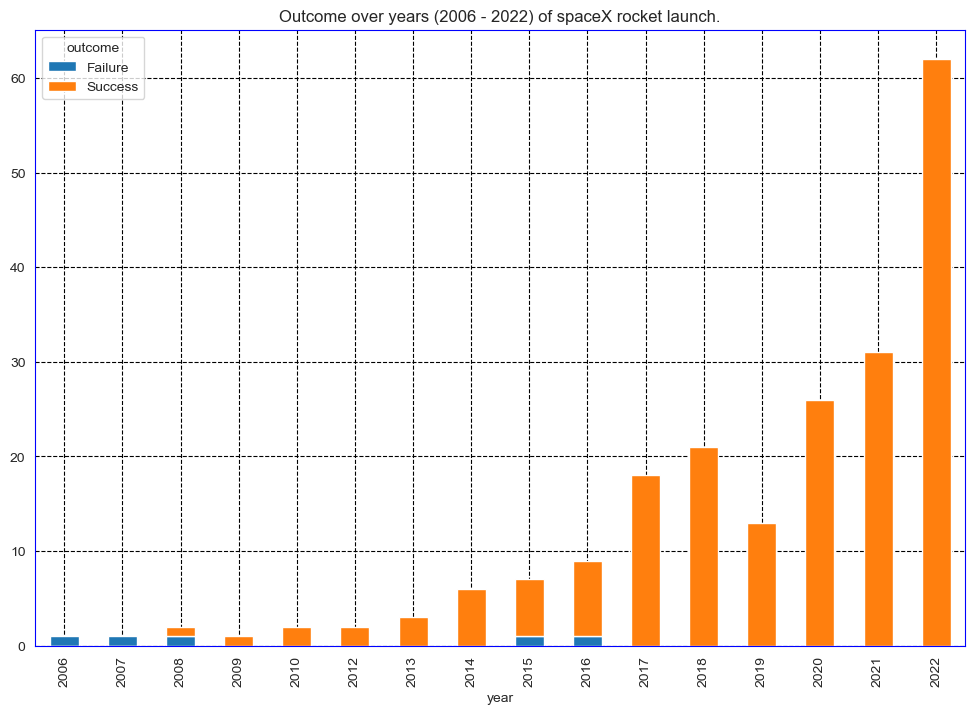

In [359]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

This is a bar chart illustrates the outcomes of many SpaceX rocket's launches over a period from 2006 to 2022. The outcomes are categorized into 2 types: Success and Failure.

The x-axis represents years, from 2006 through 2022. The y-axis represents the number of launches.

Each year has two bars adjacent to each other:
- The "Failure" bars are blue. They appear to be higher in the earlier years (2006 ~ 2008).
- The "Success" bars are orange. These show an increasing trend over time. From 2010 onward, the number of successful launchs increases substantially, especially 2022.

### Exploring numerical attributes

In [360]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [361]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return (s.isna().mean() * 100).round(1)

def median(df):
    # TODO:
    # YOUR CODE HERE
    return df.median()

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return df.quantile(0.25).round(1)

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return df.quantile(0.75).round(1)

In [362]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [363]:
# YOUR CODE HERE
num_col_df = num_col_df.drop(columns=['landpad'])

In [364]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [365]:
# YOUR CODE HERE
## Mean fill
mean_fill_rocket_height = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mean())
num_col_df['mean_fill_rocket_height'] = mean_fill_rocket_height

In [366]:
# YOUR CODE HERE
## Median fill
median_fill_rocket_height = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].median())
num_col_df['median_fill_rocket_height'] = median_fill_rocket_height

In [367]:
# YOUR CODE HERE
## Mode fill
mode_fill_rocket_height = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mode()[0])
num_col_df['mode_fill_rocket_height'] = mode_fill_rocket_height

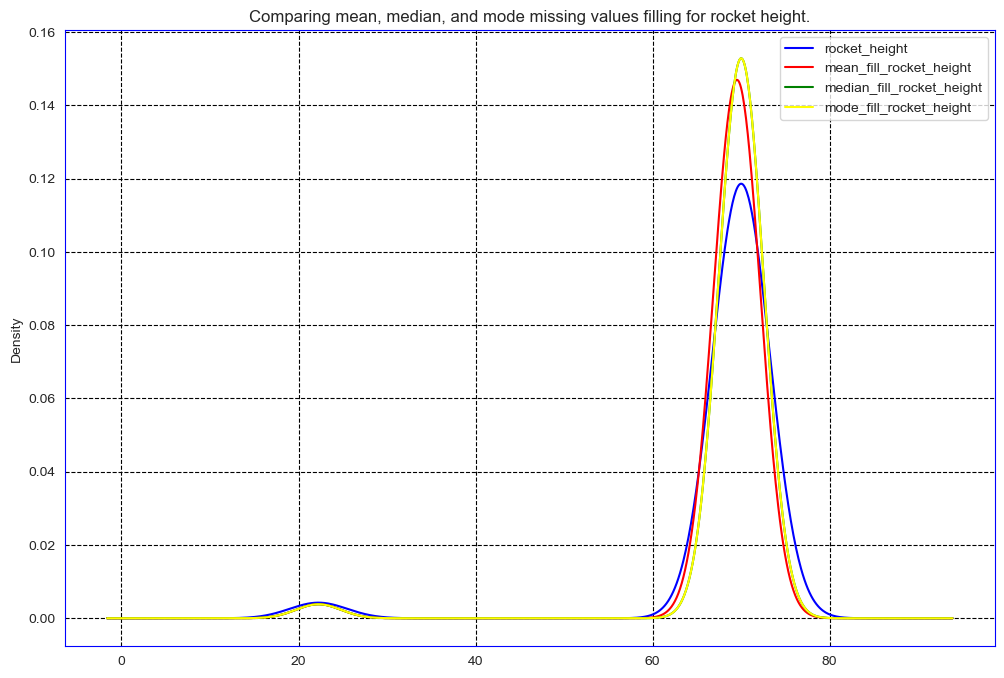

In [368]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

This plot compares the distribution of SpaceX rocket heights using different methods for imputing missing values.
The lines overlap almost perfectly; indicating that the mean, median, and mode are very close to each other. That means the rocket_height data is symmetrically distributed and the using of any of these statistics to fill missing values does not significantly change the overall distribution of the data.

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [369]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    min_height = raw_df[raw_df['rocket_name'] == rocket_name]['rocket_height'].min()
    max_height = raw_df[raw_df['rocket_name'] == rocket_name]['rocket_height'].max()

    return [min_height, max_height]

In [370]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [371]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [372]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [373]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    rockets_heights = {"Falcon 1": 22.25, "Falcon 9": 70.0, "Falcon Heavy": 70.0}

    for rocket_name, height in rockets_heights.items():
        cp_df.loc[(cp_df["rocket_name"] == rocket_name) & (cp_df["rocket_height"].isna()), "rocket_height"] = height

    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [374]:
# YOUR CODE HERE
# I choose mean

raw_df['rocket_diameter'] = raw_df['rocket_diameter'].fillna(raw_df['rocket_diameter'].mean())
raw_df['rocket_mass'] = raw_df['rocket_mass'].fillna(raw_df['rocket_mass'].mean())

In [375]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_df = num_col_df.drop(columns=['landpad'])
num_col_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.680000,3.014600e+04
1,0,22.25,1.680000,3.014600e+04
2,0,22.25,1.680000,5.564045e+05
3,0,22.25,1.680000,5.564045e+05
4,0,22.25,1.680000,3.014600e+04
...,...,...,...,...
200,0,70.00,3.700000,5.490540e+05
201,0,70.00,3.806944,5.490540e+05
202,0,70.00,3.806944,5.490540e+05
203,2,70.00,3.806944,1.420788e+06


In [376]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

rocket_boosters: discrete\
rocket_height:     continuous\
rocket_diameter:   continuous\
rocket_mass:       continuous

### Exploring non-numerical attributes

In [377]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [378]:
import ast

def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    # return eval(s)
    try:
        return ast.literal_eval(s)
    except ValueError:
        return []

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [379]:
# TODO:
# YOUR CODE HERE
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df['payloads'] = cate_col_df['payloads'].apply(lambda x: str(x))

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [380]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return (s.isnull().mean() * 100).round(1)

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    return s.nunique()

def value_ratios(s) -> dict:
    # TODO:
    # YOUR CODE HERE
    value_counts = (s.value_counts(normalize=True) * 100).round(1)
    return value_counts.to_dict()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [381]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

Because those missing ratio are not very high, we can keep these columns

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [382]:
# TODO:
# YOUR CODE HERE
condition_to_remove = (
    (cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()) |
    (cate_col_df["landpad_type"] == 'Ocean')
)
cate_col_df = cate_col_df[~condition_to_remove]

In [383]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [384]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

- Falcon Heavy rockets which have launchpad in Florida and have landpad in California that have no missing values.
- Falcon 9 rockets which have launchpad in California and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively. There're also another land name and type, which are LZ-4 and RTLS.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI-1`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`

In [385]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    rules = {
        ("OCISLY", "ASDS"): "California",
        ("JRTI", "ASDS"): "Florida",
        ("ASOG", "ASDS"): "Florida",
        ("LZ-1", "RTLS"): "Florida",
        ("LZ-4", "RTLS"): "California",
        ("JRTI-1", "ASDS"): "Florida"
    }

    for (landpad_name, landpad_type), landpad_region in rules.items():
        row = (df_cp['landpad_name'] == landpad_name) & (df_cp['landpad_type'] == landpad_type) & df_cp['landpad_region'].isnull()
        df_cp.loc[row, 'landpad_region'] = landpad_region

    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)
cate_col_df.reset_index(drop=True, inplace=True)

In [386]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [387]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [388]:
raw_df = raw_df.drop(columns=['landpad'])
# YOUR CODE HERE
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)
raw_df = raw_df.explode('payloads')
raw_df['payloads'] = raw_df['payloads'].apply(lambda x: str(x))


raw_df = fill_rocketheight(raw_df)
raw_df = raw_df[~condition_to_remove]
raw_df = fill_landpadregion(raw_df)

In [389]:
# TEST 01
assert raw_df.shape == (152, 16)

In [390]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [391]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,0
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Dragon 1.1', 'mass': 2395, 'orbit': 'ISS'}"
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Dragon 1.1', 'mass': 1898, 'orbit': 'ISS'}"
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,"{'type': 'Dragon 1.1', 'mass': 1952, 'orbit': 'ISS'}"
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,"{'type': 'Satellite', 'mass': 2034, 'orbit': 'LEO'}"
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 553, 'orbit': 'PO'}"
...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 180, 'orbit': 'VLEO'}"
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,"{'type': 'Satellite', 'mass': 14760, 'orbit': 'VLEO'}"
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 16100, 'orbit': 'VLEO'}"
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 13260, 'orbit': 'VLEO'}"


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [392]:
# YOUR CODE HERE
cate_col_df2_temp = cate_col_df2.copy()

cate_col_df2_temp[0] = cate_col_df2_temp[0].apply(str2dict)
cate_col_df2_temp['type'] = cate_col_df2_temp[0].apply(lambda x: x.get('type') if isinstance(x, dict) else None)
cate_col_df2_temp['mass'] = cate_col_df2_temp[0].apply(lambda x: x.get('mass') if isinstance(x, dict) else None)
cate_col_df2_temp['orbit'] = cate_col_df2_temp[0].apply(lambda x: x.get('orbit') if isinstance(x, dict) else None)

nan_sum = cate_col_df2_temp[['type', 'mass', 'orbit']].isna().sum(axis=1)
mask = nan_sum >= 2
cate_col_df2_temp = cate_col_df2_temp[~mask]

cate_col_df2_temp[0] = cate_col_df2_temp[0].apply(lambda x: str(x))

cate_col_df2 = cate_col_df2_temp

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [393]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2['mass'].isnull()].index

In [394]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [395]:
cate_col_df2.drop(drop_idx, inplace=True)

In [396]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [397]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df['type'] = raw_df['payloads'].apply(lambda x: x.get('type') if isinstance(x, dict) else None)
raw_df['mass'] = raw_df['payloads'].apply(lambda x: x.get('mass') if isinstance(x, dict) else None)
raw_df['orbit'] = raw_df['payloads'].apply(lambda x: x.get('orbit') if isinstance(x, dict) else None)
raw_df.drop(["payloads"], axis=1, inplace=True)

In [398]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)

In [399]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
nan_sum_rawdf = raw_df[['payloads_type', 'payloads_mass', 'payloads_orbit']].isna().sum(axis=1)
mask_rawdf = nan_sum_rawdf >= 2
raw_df = raw_df[~mask_rawdf]

In [400]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
drop_idx = raw_df[raw_df['payloads_mass'].isna()].index
raw_df.drop(drop_idx, inplace=True)

In [401]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [402]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [403]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return eval(s)

In [404]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [405]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [406]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `label encoding`, and for `nominal` attributes, you should use `one hot encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [407]:
# YOUR CODE HERE
# This is nominal!
launch_name_encoded = pd.get_dummies(raw_df['launch_name'])
raw_df = pd.concat([raw_df, launch_name_encoded], axis = 1)
raw_df.drop('launch_name', axis=1, inplace=True)

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [408]:
# YOUR CODE HERE
# This is nominal!
rocket_name_encoded = pd.get_dummies(raw_df['rocket_name'])
raw_df = pd.concat([raw_df, rocket_name_encoded], axis = 1)
raw_df.drop('rocket_name', axis=1, inplace=True)

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [409]:
# YOUR CODE HERE
# This is nominal!
launchpad_name_encoded = pd.get_dummies(raw_df['launchpad_name'])
raw_df = pd.concat([raw_df, launchpad_name_encoded], axis = 1)
raw_df.drop('launchpad_name', axis=1, inplace=True)

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [410]:
# YOUR CODE HERE
# This is nominal!
launchpad_region_encoded = pd.get_dummies(raw_df['launchpad_region'])
raw_df = pd.concat([raw_df, launchpad_region_encoded], axis = 1)
raw_df.drop('launchpad_region', axis=1, inplace=True)

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [411]:
# YOUR CODE HERE
# This is nominal!
landpad_name_encoded = pd.get_dummies(raw_df['landpad_name'])
raw_df = pd.concat([raw_df, landpad_name_encoded], axis = 1)
raw_df.drop('landpad_name', axis=1, inplace=True)

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [412]:
# YOUR CODE HERE
# This is nominal!
landpad_type_encoded = pd.get_dummies(raw_df['landpad_type'])
raw_df = pd.concat([raw_df, landpad_type_encoded], axis = 1)
raw_df.drop('landpad_type', axis=1, inplace=True)

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [413]:
# YOUR CODE HERE
# This is nominal!
landpad_region_encoded = pd.get_dummies(raw_df['landpad_region'])
raw_df = pd.concat([raw_df, landpad_region_encoded], axis = 1)
raw_df.drop('landpad_region', axis=1, inplace=True)

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [414]:
# YOUR CODE HERE
# This is nominal!
outcome_encoded = pd.get_dummies(raw_df['outcome'])
raw_df = pd.concat([raw_df, outcome_encoded], axis = 1)
raw_df.drop('outcome', axis=1, inplace=True)

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [415]:
# YOUR CODE HERE
# This is nominal!
payloads_type_encoded = pd.get_dummies(raw_df['payloads_type'])
raw_df = pd.concat([raw_df, payloads_type_encoded], axis = 1)
raw_df.drop('payloads_type', axis=1, inplace=True)

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

In [416]:
# YOUR CODE HERE
# This is nominal!
payloads_orbit_encoded = pd.get_dummies(raw_df['payloads_orbit'])
raw_df = pd.concat([raw_df, payloads_orbit_encoded], axis = 1)
raw_df.drop('payloads_orbit', axis=1, inplace=True)

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [417]:
# YOUR CODE HERE
raw_df.dtypes

uct_time           datetime64[ns, UTC]
rocket_boosters                  int64
rocket_height                  float64
rocket_diameter                float64
rocket_mass                    float64
                          ...         
MEO                               bool
PO                                bool
SSO                               bool
TLI                               bool
VLEO                              bool
Length: 185, dtype: object

In [418]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [419]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,ABS-2A / Eutelsat 117W B,ANASIS-II,Amos-6,ArabSat 6A,Ax-1,Bangabandhu-1,Boeing X-37B OTV-5,BulgariaSat-1,CCtCap Demo Mission 1,CCtCap Demo Mission 2,CRS-10,CRS-11,CRS-12,CRS-13,CRS-16,CRS-17,CRS-18,CRS-19,CRS-20,CRS-21,CRS-22 & IROSA,CRS-23,CRS-24,CRS-5,CRS-6,CRS-7,CRS-8,CRS-9,CSG-2,Crew-1,Crew-3,Crew-4,DART,Es’hail 2,Falcon Heavy Test Flight,FormoSat-5,GPS III SV03 (Columbus),GPS III SV04 (Sacagawea),GPS III SV05,Globalstar FM15,IXPE,Inspiration4,Iridium NEXT Mission 1,Iridium NEXT Mission 2,Iridium NEXT Mission 3,Iridium NEXT Mission 7,Iridium NEXT Mission 8,JCSAT-16,JCSAT-2B,JCSat 18 / Kacific 1,Jason 3,KPLO,KoreaSat 5A,Merah Putih,NROL-85,Nilesat-301,Nusantara Satu (PSN-6) / S5 / Beresheet,OG-2 Mission 2,RADARSAT Constellation,SAOCOM 1A,"SAOCOM 1B, GNOMES-1, Tyvak-0172",SARah 1,SES-10,SES-11 / Echostar 105,SES-22,SES-9,SSO-A,STP-2,SXM-7,SXM-8,Sentinel-6 Michael Freilich,Starlink 2-1 (v1.5),Starlink 3-1 (v1.5),Starlink 3-2 (v1.5),Starlink 3-3 (v1.5),Starlink 3-4 (v1.5),Starlink 4-1 (v1.5),Starlink 4-10 (v1.5),Starlink 4-11 (v1.5),Starlink 4-12 (v1.5),Starlink 4-13 (v1.5),Starlink 4-14 (v1.5),Starlink 4-15 (v1.5),Starlink 4-16 (v1.5),Starlink 4-17 (v1.5),Starlink 4-18 (v1.5),Starlink 4-19 (v1.5),Starlink 4-2 (v1.5) & Blue Walker 3,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Starlink 4-21 (v1.5),Starlink 4-22 (v1.5),Starlink 4-23 (v1.5),Starlink 4-25 (v1.5),Starlink 4-26 (v1.5),Starlink 4-27 (v1.5),Starlink 4-3 (v1.5),Starlink 4-34 (v1.5),Starlink 4-35 (v1.5),Starlink 4-4 (v1.5),Starlink 4-5 (v1.5),Starlink 4-6 (v1.5),Starlink 4-7 (v1.5),Starlink 4-8 (v1.5),Starlink 4-9 (v1.5),Starlink v0.9,Starlink-1,Starlink-10 (v1.0) & SkySat 19-21,Starlink-11 (v1.0),Starlink-12 (v1.0),Starlink-13 (v1.0),Starlink-14 (v1.0),Starlink-15 (v1.0),Starlink-16 (v1.0),Starlink-17 (v1.0),Starlink-18 (v1.0),Starlink-19 (v1.0),Starlink-2,Starlink-20 (v1.0),Starlink-21 (v1.0),Starlink-22 (v1.0),Starlink-23 (v1.0),Starlink-24 (v1.0),Starlink-25 (v1.0),Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,Starlink-27 (v1.0),Starlink-28 (v1.0),Starlink-3,Starlink-4,Starlink-5,Starlink-6,Starlink-7,Starlink-8 & SkySat 16-18,Starlink-9 (v1.0) & BlackSky Global 5-6,TESS,Telstar 18V,Telstar 19V,Thaicom 8,Transporter-1,Transporter-4,Turksat 5A,Türksat 5B,Falcon 9,Falcon Heavy,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,California,Florida,ASOG,JRTI,JRTI-1,LZ-1,LZ-4,OCISLY,ASDS,RTLS,California,Florida,Failure,Success,Crew Dragon,Dragon 1.1,Dragon 2.0,Satellite,GEO,GTO,HCO,HEO,ISS,LEO,MEO,PO,SSO,TLI,VLEO
18,2015-01-10 09:47:00+00:00,0,70.0,3.7,549054.000000,2395.0,28.561857,-80.577366,28.410400,-80.618800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
21,2015-04-14 20:10:00+00:00,0,70.0,3.7,549054.000000,1898.0,28.561857,-80.577366,28.410400,-80.618800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

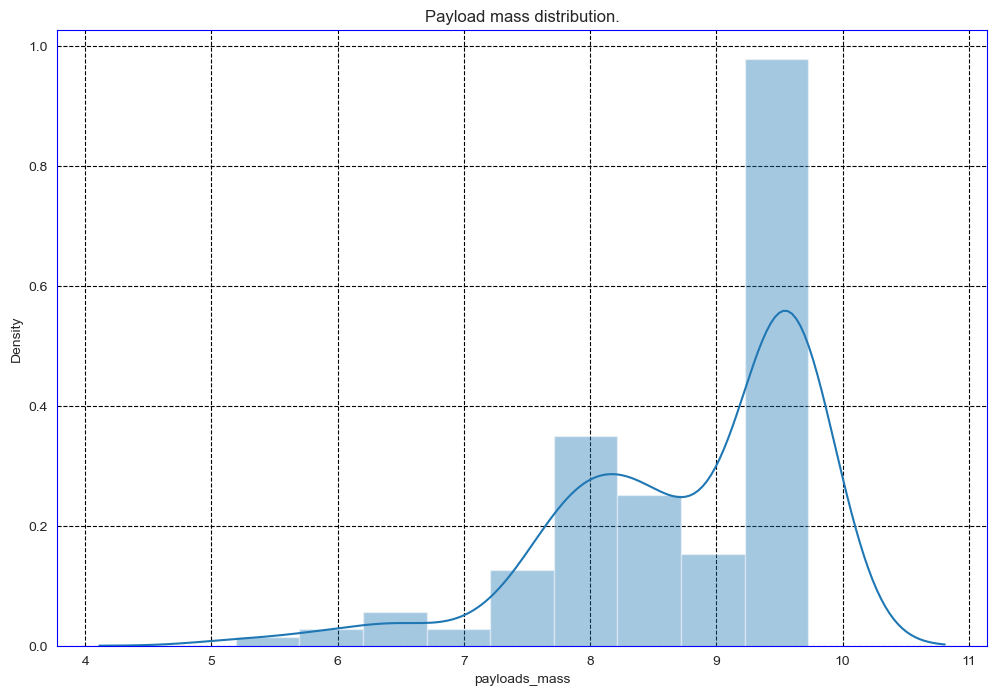

In [420]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [421]:
# YOUR CODE HERE
# raise NotImplementedError()
mass_min = raw_df['payloads_mass'].min()
mass_max = raw_df['payloads_mass'].max()
mass_range = mass_max - mass_min

In [422]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [423]:
# YOUR CODE HERE
lower_interval = int(np.floor(mass_min))
upper_interval = int(np.ceil(mass_max))

In [424]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [425]:
# YOUR CODE HERE
# interval_size =?
# total_bins =?

# Q2 = raw_df['payloads_mass'].quantile(0.5)
# Q3 = raw_df['payloads_mass'].quantile(0.75)
# IQR = Q3 - Q2
# n = len(raw_df['payloads_mass'])

# h = 2 * IQR * n**(-1/3)

total_bins = 4
interval_size = int(np.round((mass_max - mass_min) / total_bins))

intervals = [i for i in range(lower_interval, upper_interval + interval_size, interval_size)]

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [426]:
# YOUR CODE HERE
labels = ['bin_no_' + str(i) for i in range(1, len(intervals))]
labels

['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [427]:
# YOUR CODE HERE
# Using pandas cut() method to assign each value to a bin
raw_df['payloads_mass_bins'] = pd.cut(x = raw_df.payloads_mass, bins = intervals, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

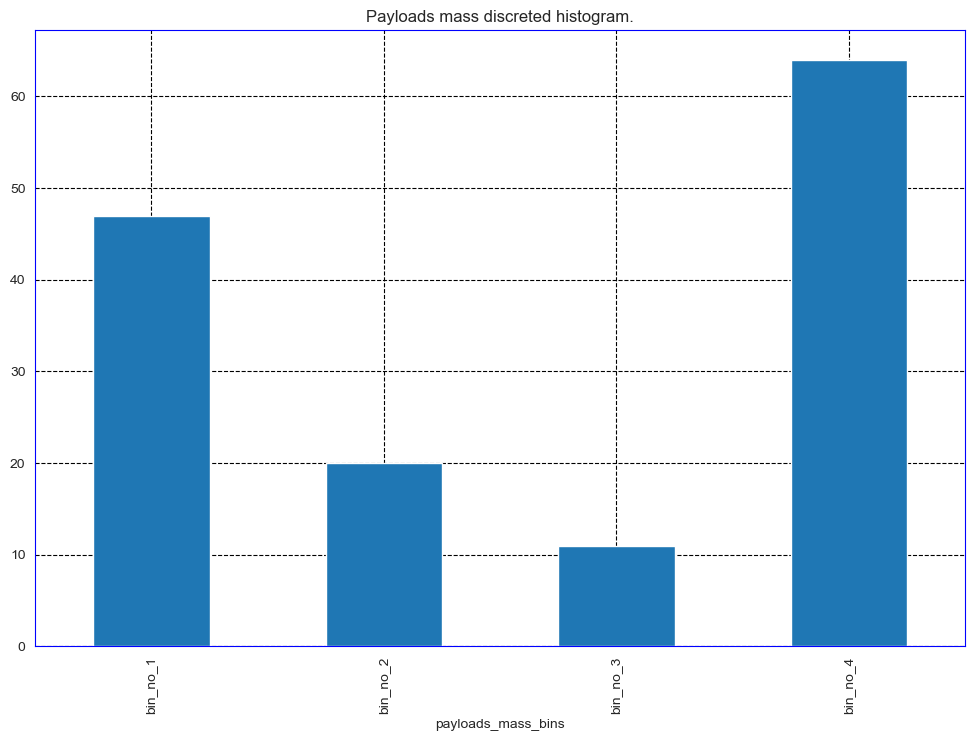

In [428]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

The bar chart shows the distribution of payload masses categorized into four bins:

- **bin_no_1** has the second-highest count, over 40 instances.
- **bin_no_2** shows significantly fewer instances, around 10.
- **bin_no_3** is the fewest, approximately more than 5.
- **bin_no_4** has the highest count, about 60 instances.

The x-axis is labeled "payloads_mass_bins," and each bar corresponds to one of the labeled bins. The y-axis represents the count of instances within each bin.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [429]:
# YOUR CODE HERE
equal_freq_bins, bin_edges = pd.qcut(raw_df['payloads_mass'], 4, retbins=True, labels=[f'bin_no_{i+1}' for i in range(4)])

- Step 02: Create bin labels

In [430]:
# YOUR CODE HERE
bin_labels = [f'{int(bin_edges[i])} to {int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [431]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bin_edges, labels=bin_labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

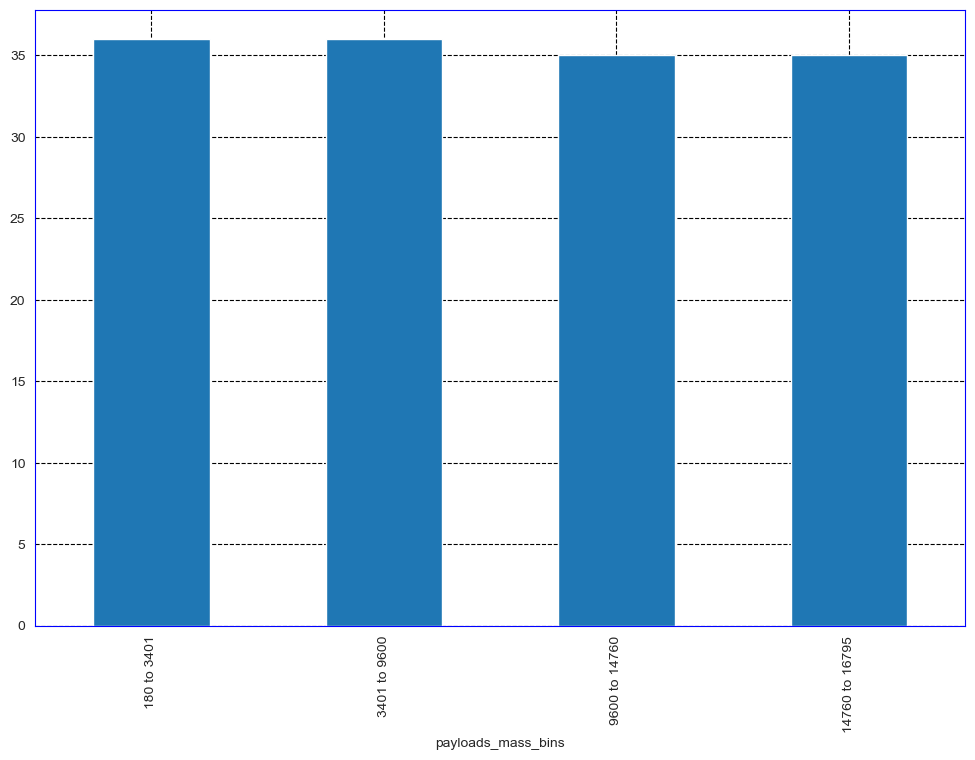

In [432]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)
- In discretization using `k-means clustering`, the partitions are the clusters identified by the k-means algorithm.
Discretization with k-means requires one parameter, which is `k`, the number of clusters or the number of bins. We can carry out k-means discretization with scikit-learn.
- On the other hand, a `decision tree` evaluates all possible values of a feature and selects the cut-point that maximizes the class separation by utilizing a performance metric like the entropy or Gini impurity. Then it repeats the process for each node of the first data separation and for each node of the subsequent data splits, until a certain stopping criteria is reached.

In [433]:
# YOUR CODE HERE (Optional)
# K-means Discretization

# Extract payloads_mass column
payloads_mass_temp = raw_df[['payloads_mass']]

# Define the number of clusters
num_clusters = 5

# Applying k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(payloads_mass_temp)

# Getting the centroids
centroids = kmeans.cluster_centers_

# Sorting the centroids
centroids = np.sort(centroids, axis = 0)

# Discretizing the data
discretized_data = np.zeros_like(payloads_mass_temp)
for i in range(num_clusters):
    if i == 0:
        discretized_data[payloads_mass_temp <= centroids[i]] = i
    elif i == num_clusters - 1:
        discretized_data[payloads_mass_temp > centroids[i - 1]] = i
    else:
        discretized_data[(payloads_mass_temp > centroids[i - 1]) & (payloads_mass_temp <= centroids[i])] = i

# Adding the discretized data as a new column in raw_df
raw_df['payloads_mass_discretized'] = discretized_data

# Result
raw_df[['payloads_mass', 'payloads_mass_discretized']]

,payloads_mass,payloads_mass_discretized
18,2395.0,1.0
21,1898.0,1.0
23,1952.0,1.0
24,2034.0,1.0
25,553.0,0.0
...,...,...
182,13260.0,4.0
182,180.0,0.0
183,14760.0,4.0
184,16100.0,4.0


In [434]:
# Decision Tree Discretization

# Initialize Decision Tree Regressor
tree = DecisionTreeRegressor(max_leaf_nodes=6)

# Fit the Decision Tree Regressor
tree.fit(payloads_mass_temp, payloads_mass_temp)

# Initialize KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')

# Fit and transform the data
discretized_data = kbd.fit_transform(payloads_mass_temp)

# Adding the discretized data as a new column in the DataFrame
raw_df['payloads_mass_discretized'] = discretized_data

# Result
raw_df[['payloads_mass', 'payloads_mass_discretized']]

,payloads_mass,payloads_mass_discretized
18,2395.0,0.0
21,1898.0,0.0
23,1952.0,0.0
24,2034.0,0.0
25,553.0,0.0
...,...,...
182,13260.0,4.0
182,180.0,0.0
183,14760.0,5.0
184,16100.0,5.0


In [435]:
raw_df.drop(['payloads_mass_discretized'], axis=1, inplace=True)

In [436]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

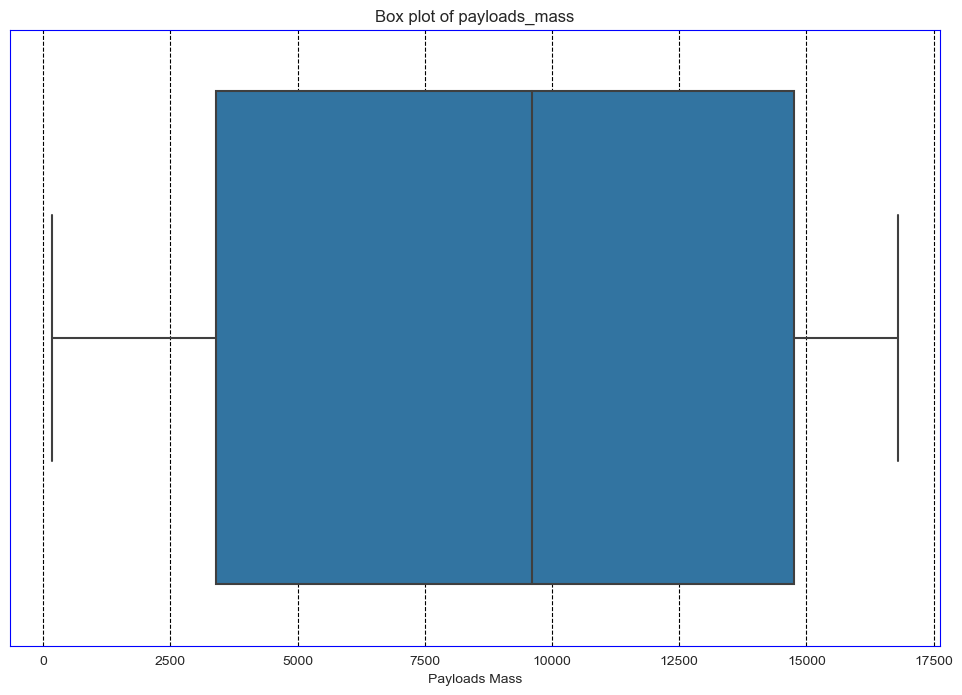

In [437]:
# YOUR CODE HERE

sns.boxplot(x=raw_df['payloads_mass'])
plt.title('Box plot of payloads_mass')
plt.xlabel('Payloads Mass')
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [438]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_bound = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_bound = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

- Step 03: Construct rule for trimming outliers.

In [439]:
trimming_rule = (raw_df['payloads_mass'] < lower_bound) | (raw_df['payloads_mass'] > upper_bound)

- Step 04: Trimming outliers

In [440]:
# rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]
raw_df = raw_df[~trimming_rule]

TODO: What are the advantages and disadvantages of outlier trimming?

- Advantages:
    - It's a simple process that doesn't require complex algorithms or modeling.
    - Models which are sensitive to outliers (linear regression, ...), trimming can prevent the skewing of results effectively and improve the performance of statistical analyses.
- Disadvantages:
    - Trimming outliers could result in the loss of potentially valuable information.
    - Choosing threshold for trimming sometimes may not be appropriate for all datasets or analyses.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

The Interquartile Range (IQR) is the range between the first quartile and the third quartile of the dataset. The IQR is often used to cap outliers in a process known as "capping" or "fencing". The most common distance used to define outliers in terms of the IQR is 1.5 times the IQR above the third quartile and below the first quartile.

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [441]:
# YOUR CODE HERE
# Calculate the mean and standard deviation
mean = raw_df['payloads_mass'].mean()
sigma = raw_df['payloads_mass'].std()

upper_bound = mean + 3 * sigma
lower_bound = mean - 3 * sigma

- Step 02: Construct rule for trimming outliers.

In [442]:
# YOUR CODE HERE
trimming_rule = (raw_df['payloads_mass'] < lower_bound) | (raw_df['payloads_mass'] > upper_bound)

- Step 03: Trimming outliers

In [443]:
# YOUR CODE HERE
raw_df = raw_df[~trimming_rule]

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

- Advantages:
    - For data that follows a normal (Gaussian) distribution, this method effectively identifies outliers, as the distribution's properties are well-defined.
    - The mean and standard deviation are fundamental statistical measures, making this method understand and easy to implement.
    - It provides a clear, quantifiable threshold for defining outliers, making it easy to explain and justify the removal of outliers.
- Disadvantages:
    - This method assumes the data is normally distributed. For skewed or non-normal distributions, mean and standard deviation may not accurately reflect the data's central tendency and dispersion, leading to inappropriate outlier detection.
    - Both the mean and standard deviation are sensitive to outliers themselves, meaning outliers can affect the calculation of the very thresholds meant to identify them.
    - Depending on the distribution and the choice of threshold, this method may either remove too many data points or not enough, affecting the analysis process.


### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [444]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].quantile(0.90)
lower_bound = raw_df['payloads_mass'].quantile(0.10)

- Step 02: Construct rule for trimming outliers.

In [445]:
# YOUR CODE HERE
trimming_rule = (raw_df['payloads_mass'] < lower_bound) | (raw_df['payloads_mass'] > upper_bound)

- Step 03: Trimming outliers

In [446]:
# YOUR CODE HERE
raw_df = raw_df[~trimming_rule]

TODO: What are the advantages and disadvantages of using Quantiles?

- Advantages:
    - Quantiles are less affected by skewed distributions and extreme values than methods based on the mean and standard deviation. This makes quantile-based methods suitable for a wider range of data distributions.
    - By adjusting which quantiles to use, we can control the strictness of outlier detection and removal.
    - Quantiles are straightforward to understand and communicate, making it easy to explain the rationale behind trimming decisions to a non-technical audience.
    - This method adapts to the underlying data distribution, allowing for tailored outlier detection that reflects the specific characteristics of the dataset.
- Disadvantages:
    - As some methods above, this method also may result in the removal of a significant portion of the data, potentially including valuable information.
    - The choice of quantiles is somewhat arbitrary and may need to be adjusted based on the specific context or goals of the analysis.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [447]:
scaler = StandardScaler()

- Step 02: Fitting

In [448]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [449]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [450]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,ABS-2A / Eutelsat 117W B,ANASIS-II,Amos-6,ArabSat 6A,Ax-1,Bangabandhu-1,Boeing X-37B OTV-5,BulgariaSat-1,CCtCap Demo Mission 1,CCtCap Demo Mission 2,CRS-10,CRS-11,CRS-12,CRS-13,CRS-16,CRS-17,CRS-18,CRS-19,CRS-20,CRS-21,CRS-22 & IROSA,CRS-23,CRS-24,CRS-5,CRS-6,CRS-7,CRS-8,CRS-9,CSG-2,Crew-1,Crew-3,Crew-4,DART,Es’hail 2,Falcon Heavy Test Flight,FormoSat-5,GPS III SV03 (Columbus),GPS III SV04 (Sacagawea),GPS III SV05,Globalstar FM15,IXPE,Inspiration4,Iridium NEXT Mission 1,Iridium NEXT Mission 2,Iridium NEXT Mission 3,Iridium NEXT Mission 7,Iridium NEXT Mission 8,JCSAT-16,JCSAT-2B,JCSat 18 / Kacific 1,Jason 3,KPLO,KoreaSat 5A,Merah Putih,NROL-85,Nilesat-301,Nusantara Satu (PSN-6) / S5 / Beresheet,OG-2 Mission 2,RADARSAT Constellation,SAOCOM 1A,"SAOCOM 1B, GNOMES-1, Tyvak-0172",SARah 1,SES-10,SES-11 / Echostar 105,SES-22,SES-9,SSO-A,STP-2,SXM-7,SXM-8,Sentinel-6 Michael Freilich,Starlink 2-1 (v1.5),Starlink 3-1 (v1.5),Starlink 3-2 (v1.5),Starlink 3-3 (v1.5),Starlink 3-4 (v1.5),Starlink 4-1 (v1.5),Starlink 4-10 (v1.5),Starlink 4-11 (v1.5),Starlink 4-12 (v1.5),Starlink 4-13 (v1.5),Starlink 4-14 (v1.5),Starlink 4-15 (v1.5),Starlink 4-16 (v1.5),Starlink 4-17 (v1.5),Starlink 4-18 (v1.5),Starlink 4-19 (v1.5),Starlink 4-2 (v1.5) & Blue Walker 3,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Starlink 4-21 (v1.5),Starlink 4-22 (v1.5),Starlink 4-23 (v1.5),Starlink 4-25 (v1.5),Starlink 4-26 (v1.5),Starlink 4-27 (v1.5),Starlink 4-3 (v1.5),Starlink 4-34 (v1.5),Starlink 4-35 (v1.5),Starlink 4-4 (v1.5),Starlink 4-5 (v1.5),Starlink 4-6 (v1.5),Starlink 4-7 (v1.5),Starlink 4-8 (v1.5),Starlink 4-9 (v1.5),Starlink v0.9,Starlink-1,Starlink-10 (v1.0) & SkySat 19-21,Starlink-11 (v1.0),Starlink-12 (v1.0),Starlink-13 (v1.0),Starlink-14 (v1.0),Starlink-15 (v1.0),Starlink-16 (v1.0),Starlink-17 (v1.0),Starlink-18 (v1.0),Starlink-19 (v1.0),Starlink-2,Starlink-20 (v1.0),Starlink-21 (v1.0),Starlink-22 (v1.0),Starlink-23 (v1.0),Starlink-24 (v1.0),Starlink-25 (v1.0),Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,Starlink-27 (v1.0),Starlink-28 (v1.0),Starlink-3,Starlink-4,Starlink-5,Starlink-6,Starlink-7,Starlink-8 & SkySat 16-18,Starlink-9 (v1.0) & BlackSky Global 5-6,TESS,Telstar 18V,Telstar 19V,Thaicom 8,Transporter-1,Transporter-4,Turksat 5A,Türksat 5B,Falcon 9,Falcon Heavy,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,California,Florida,ASOG,JRTI,JRTI-1,LZ-1,LZ-4,OCISLY,ASDS,RTLS,California,Florida,Failure,Success,Crew Dragon,Dragon 1.1,Dragon 2.0,Satellite,GEO,GTO,HCO,HEO,ISS,LEO,MEO,PO,SSO,TLI,VLEO
0,-0.130189,0.0,-0.158454,-0.118913,-1.391798,-0.428868,0.42085,-1.393199,1.386801,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,-0.09167,-0.09167,-0.09167,-0.09167,10.908712,0.0,0.0,-0.091670,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,-0.09167,0.0,-0.09167,-0.09167,-0.09167,-0.09167,0.0,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.091670,-0.09167,0.0,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.091670,-0.09167,-0.09167,-0.09167,-0.09167,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,-0.09167,-0.09167,0.0,-0.09167,0.0,-0.09167,0.0,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,-0.09167,0.0,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,-0.09167,0.0,0.0,-0.09167,-0.09167,-0.091670,-0.09167,-0.09167,-0.09167,-0.09167,0.130189,-0.130189,1.0,-0.733799,-0.420084,-0.420084,0.420084,-0.420084,-0.57735,10.908712,-0.301511,-0.160128,-0.96

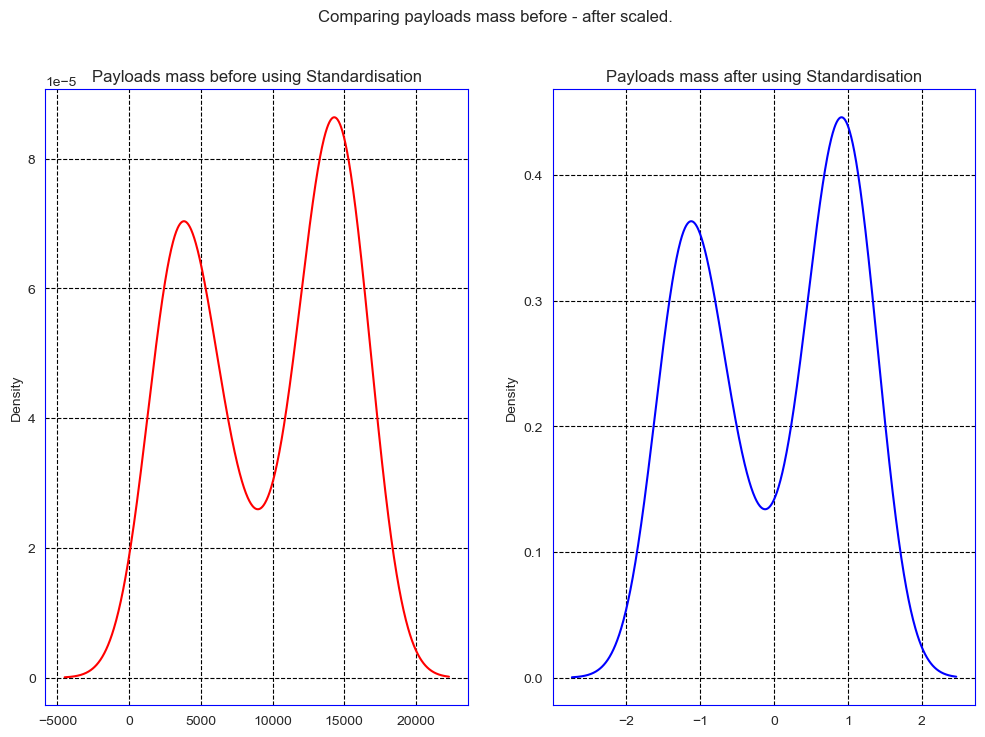

In [451]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

In [452]:
# YOUR CODE HERE
scaler = MinMaxScaler()

payloads_mass = raw_df['payloads_mass'].values.reshape(-1, 1)
scaled_payloads_mass = scaler.fit_transform(payloads_mass)
scaled_df = pd.DataFrame({'payloads_mass': raw_df['payloads_mass'], 'scaled_payloads_mass': scaled_payloads_mass.flatten()})

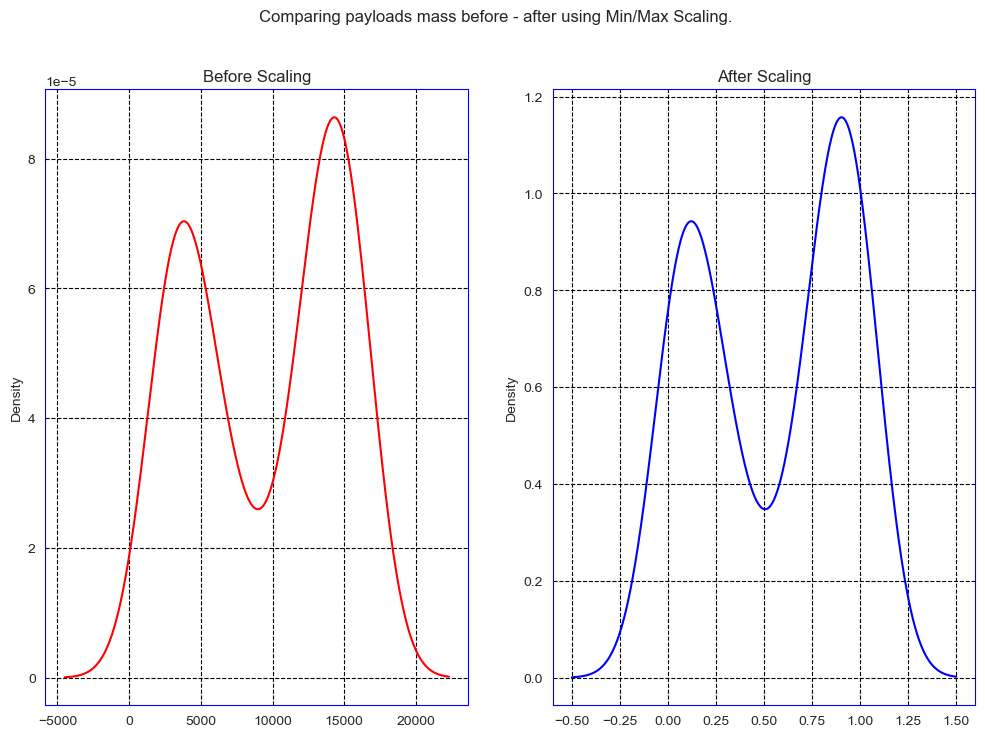

In [453]:
fig, axes = plt.subplots(1, 2)

# Before scaling
scaled_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
scaled_df['scaled_payloads_mass'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Min/Max Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*

- Mean Normalization:
    - In mean normalization, each feature is adjusted so that its mean (average) is zero. This is achieved by subtracting the mean of the feature from each data point in that feature's column.
    - The formula for mean normalization is:
        $$ x_{\text{normalized}} = \frac{x - \text{mean}(x)}{\text{std}(x)} $$
    - Mean normalization centers the data around zero, with a standard deviation of 1.
- Min/Max Scaling:
    - Min/max scaling, also known as min-max normalization, scales the data to a fixed range—typically between 0 and 1. It achieves this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value).
    - The formula for min/max scaling is:
        $$ x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$
    - Min/max scaling preserves the original distribution of the data, only scaling it linearly to fit within a specific range.

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

In [454]:
# YOUR CODE HERE
scaler = StandardScaler(with_mean=True, with_std=False)
scaled_payloads_mass = scaler.fit_transform(payloads_mass)
scaled_df['scaled_payloads_mass'] = scaled_payloads_mass

In [455]:
scaled_df

,payloads_mass,scaled_payloads_mass
18,2395.0,-7185.405833
26,5271.0,-4309.405833
27,3136.0,-6444.405833
28,4696.0,-4884.405833
29,3100.0,-6480.405833
...,...,...
180,13260.0,3679.594167
181,13260.0,3679.594167
182,13260.0,3679.594167
183,14760.0,5179.594167


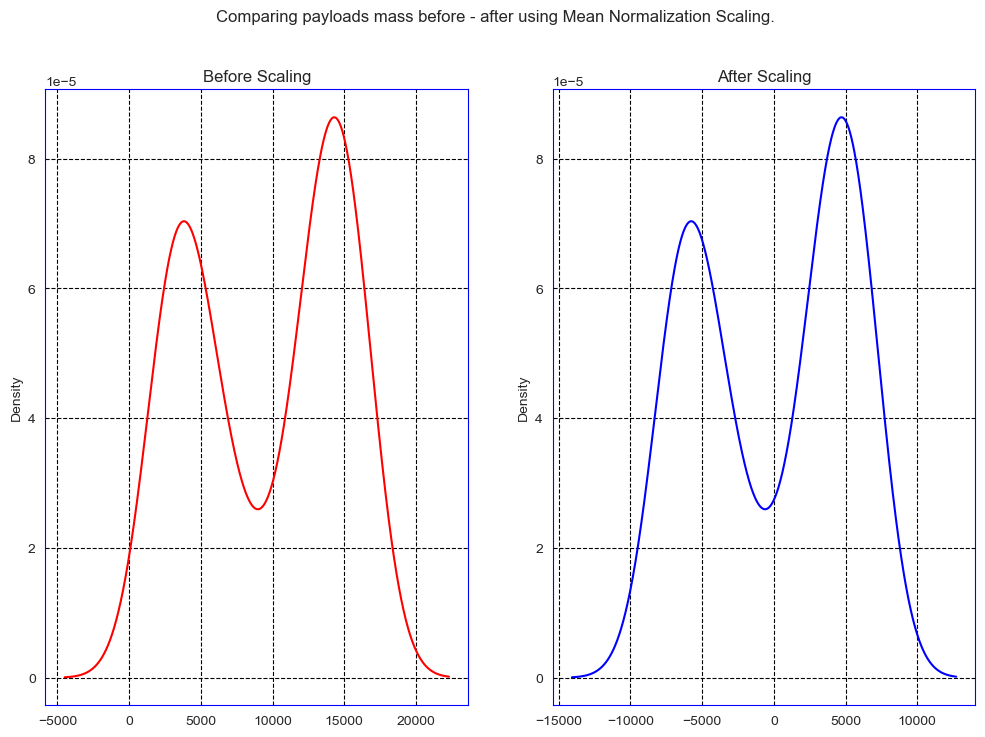

In [456]:
# Visualize the result
fig, axes = plt.subplots(1, 2)

# Before scaling
scaled_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
scaled_df['scaled_payloads_mass'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Mean Normalization Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

In [457]:
# YOUR CODE HERE
scaler = MaxAbsScaler()
scaled_payloads_mass = scaler.fit_transform(payloads_mass)
scaled_df['scaled_payloads_mass'] = scaled_payloads_mass

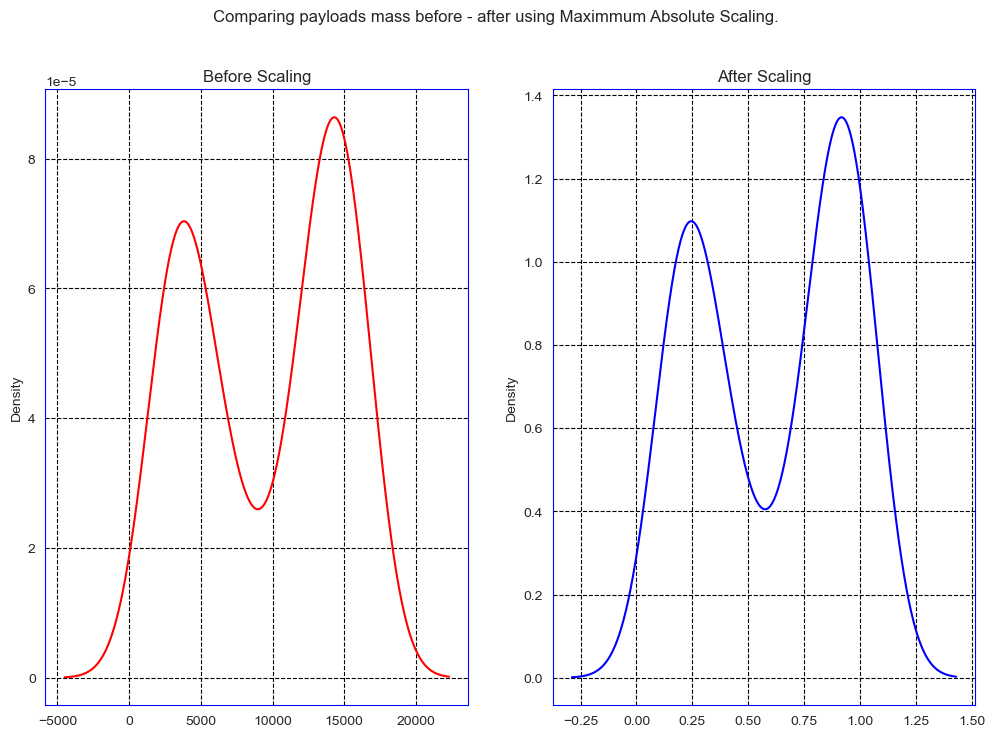

In [458]:
# Visualize the result
fig, axes = plt.subplots(1, 2)

# Before scaling
scaled_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
scaled_df['scaled_payloads_mass'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Maximmum Absolute Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

In [459]:
# YOUR CODE HERE
scaler = RobustScaler()
scaled_payloads_mass = scaler.fit_transform(payloads_mass)
scaled_df['scaled_payloads_mass'] = scaled_payloads_mass

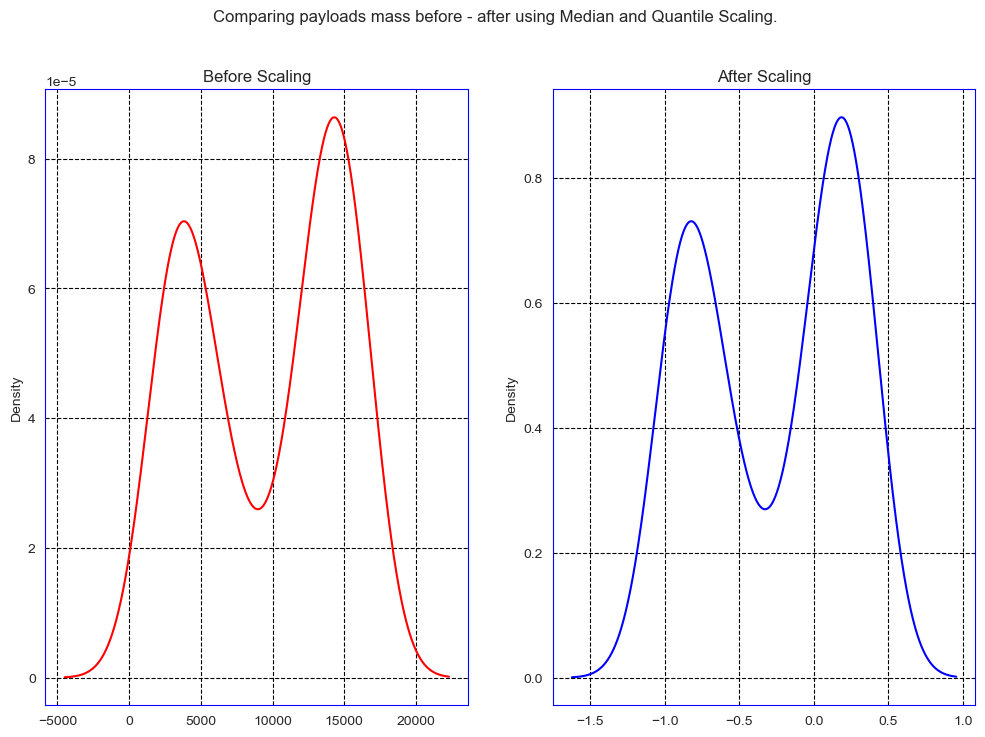

In [460]:
# Visualize the result
fig, axes = plt.subplots(1, 2)

# Before scaling
scaled_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
scaled_df['scaled_payloads_mass'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Median and Quantile Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

In [461]:
# YOUR CODE HERE
scaler = Normalizer(norm='l2')
scaled_payloads_mass = scaler.fit_transform(payloads_mass)
scaled_df['scaled_payloads_mass'] = scaled_payloads_mass

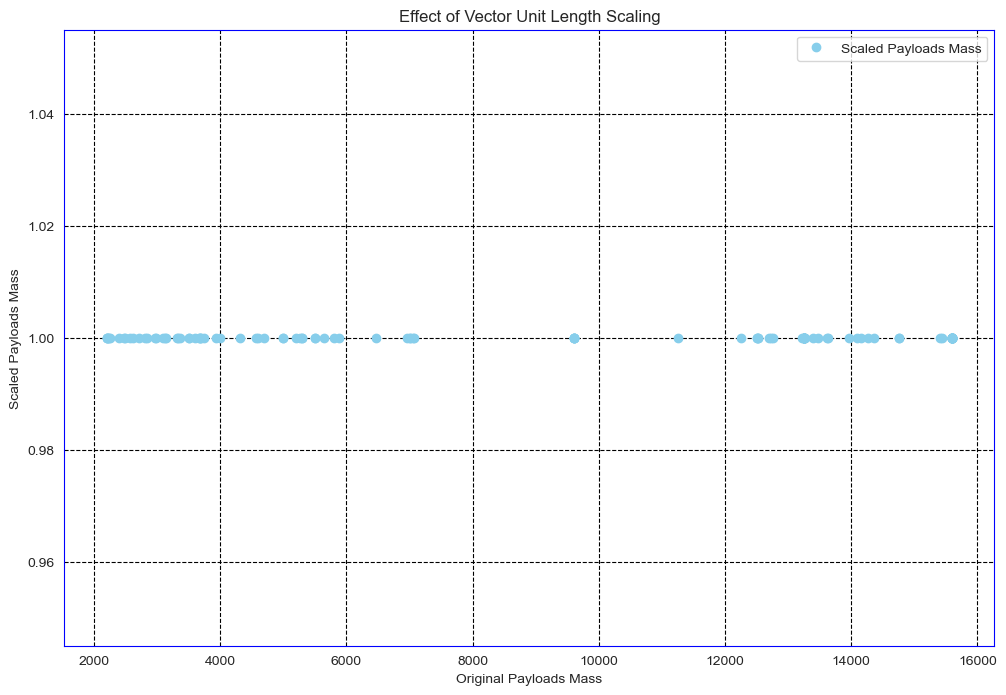

In [462]:
# Visualize the result
plt.plot(scaled_df['payloads_mass'], scaled_payloads_mass, 'o', color='skyblue', label='Scaled Payloads Mass')
plt.title('Effect of Vector Unit Length Scaling')
plt.xlabel('Original Payloads Mass')
plt.ylabel('Scaled Payloads Mass')
plt.legend()
plt.grid(True)
plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

Normalization techniques are applied to preprocess data before feeding it into machine learning algorithms. The choice of normalization technique depends on various factors such as the characteristics of the data, the machine learning algorithm being used, and the problem at hand.
- Standardization:
    - When the distribution of the features is Gaussian-like.
    - When using algorithms that assume zero-centered data.
- Min-max scaling:
    - When the features have a known minimum and maximum value.
    - When preserving the relationships between original values is important.
- Mean normalization:
    - When the mean of the data should be centered at zero.
- Maximum absolute scaling:
    - When outliers are present and need to be preserved.
- Median and quantile scaling:
    - When the data contains outliers and you want to scale the data based on robust statistics.
- Vector unit length scaling:
    - When the direction of the data vectors is important.

End of your lab 01.